In [2]:
import importlib
import theano.tensor as T
import sys, os
sys.path.append("/home/bl3/PycharmProjects/GeMpy/GeMpy")
sys.path.append("/home/bl3/PycharmProjects/GeMpy/pygeomod/pygeomod")
import GeoMig
#import geogrid
#importlib.reload(GeoMig)
importlib.reload(GeoMig)


import numpy as np
%matplotlib inline
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
np.set_printoptions(precision = 4, linewidth= 300, suppress =  True)
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm


test = GeoMig.Interpolator(c_o =None, range_var = 17, nugget_effect= 0.01, u_grade = 9, rescaling_factor=7.5
                          )
test.set_extent(0,10,0,10,0,10)
test.set_resolutions(40,10,40)
test.create_regular_grid_3D()
test.theano_compilation_3D();
#test.theano_set_3D_nugget_degree0()

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '13583' (I am process '30752')
/home/bl3/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.
/home/bl3/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.


In [10]:
test.a.get_value(), test.c_o.get_value()

(array(17), array(6.8809523809523805))

In [3]:
layer_1 = np.array([[0.5,4,7], [2,4,6], [4,4,7], [5,4,5], [8,4,7], [7,4,8], [1,5,7]], dtype = "float64")#-np.array([5,5,4]))/8+0.5
layer_2 = np.array([[3,5,5]])#, [6,5,4]])
layer_3 = np.array([[1,5,1],[1,5,2],[6,5,3]], dtype = "float64")#- np.array([5,5,4]))/8+0.5

dip_pos_1 = np.array([5,4,7], dtype = "float64")#- np.array([5,5,4]))/8+0.5
dip_pos_2 = np.array([7.,5,2], dtype = "float64")
dip_pos_3 = np.array([8,4,5], dtype = "float64")
dip_angle_1 = float(15)
dip_angle_2 = float(230)


layers = np.asarray([layer_1,layer_2])#,np.array([[2,5,11],[3,1,2],[6,2,1]])])
test.layers = np.asarray([layer_1,layer_2])
dips = np.asarray([dip_pos_1, dip_pos_2])#, dip_pos_3])
dips_angles = np.asarray([dip_angle_1, dip_angle_2], dtype="float64")
azimuths = np.asarray([90,90], dtype="float64")
polarity = np.asarray([1,1], dtype="float64")
#print (dips_angles)
rest = np.vstack((i[1:] for i in layers))
ref = np.vstack((np.tile(i[0],(np.shape(i)[0]-1,1)) for i in layers))
dips_angles.dtype
rest = rest.astype("float64")
ref = ref.astype("float64")

test.azimuths = azimuths
test.dips_angles = dips_angles
test.polarity = polarity
test.dips = dips.astype("float64")
dips_angles = dips_angles.astype("float64")
type(dips_angles)
#test.G_x,test.G_y,test.G_z = test.interpolate(test.dips,dips_angles,
#                                              azimuths,polarity, rest, ref)[-3:]
rest, ref;

In [11]:
layers[0].ndim

2

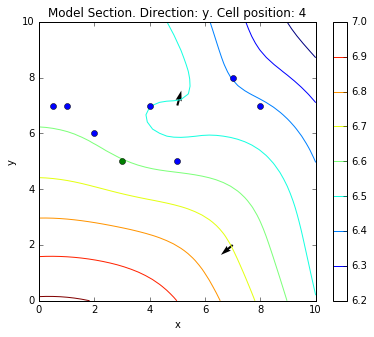

In [5]:
par2 = 1/(7.5**2)
w = 1/7.5
test.potential_field = test.interpolate(dips,dips_angles,azimuths,polarity, rest, ref)[0].reshape(40,10,40)
test.potential_field = np.swapaxes(test.potential_field,0,1)

test.azimuths = azimuths
test.dips_angles = dips_angles
test.polarity = polarity
test.dips = dips.astype("float64")
test.calculate_gradient()
test.plot_potential_field_2D(direction="y", cell_pos = 4, figsize = (6.2,5), colorbar = True)


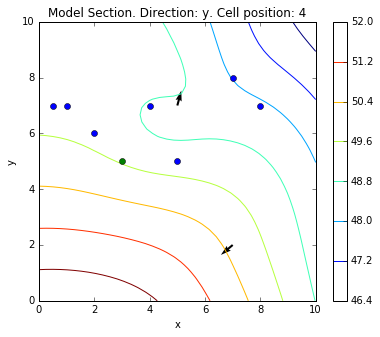

In [21]:
par2 = 1/(1**2)
w = 1/1
test.potential_field = test.interpolate(dips,dips_angles,azimuths,polarity, rest, ref,
par2, w)[0].reshape(40,10,40)
test.potential_field = np.swapaxes(test.potential_field,0,1)

test.azimuths = azimuths
test.dips_angles = dips_angles
test.polarity = polarity
test.dips = dips.astype("float64")
test.calculate_gradient()
test.plot_potential_field_2D(direction="y", cell_pos = 4, figsize = (6.2,5), colorbar = True)
